#### Importing all required library

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import string
import cv2

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import sys
import os
import csv

from scipy.io import loadmat
from PIL import Image
import requests
import urllib.request

from os import listdir
from pickle import dump
# from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
import skimage
from skimage import io
from skimage import transform

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU

from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re

from keras.utils import to_categorical, plot_model
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras import Sequential
import tensorflow as tf

from os import listdir
from pickle import dump
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications import ResNet50
from keras.models import Model


from tensorflow.keras.applications import VGG16
from keras.utils import to_categorical, plot_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras import Sequential
import tensorflow as tf


#### Downloading dataset

In [215]:
!gdown --id 1YfHGdI4YBJ29g1Yxu_ktVCN2qhKx7abx

Downloading...
From: https://drive.google.com/uc?id=1YfHGdI4YBJ29g1Yxu_ktVCN2qhKx7abx
To: /content/DL_Project_Datasets.zip
100% 1.68M/1.68M [00:00<00:00, 113MB/s]


In [216]:
import zipfile
with zipfile.ZipFile("/content/DL_Project_Datasets.zip","r") as zip_ref:
    zip_ref.extractall("/content")

In [217]:
dataPascal = loadmat('/content/Datasets/pascal50S.mat')

#Task 1

#### Downloading dataset

In [218]:
!gdown --id 185PSrNWjt-IQZnjcjaofELYYnCmMRw2p

Downloading...
From: https://drive.google.com/uc?id=185PSrNWjt-IQZnjcjaofELYYnCmMRw2p
To: /content/images.zip
115MB [00:00, 125MB/s]


In [219]:
import zipfile
with zipfile.ZipFile("/content/images.zip","r") as zip_ref:
    zip_ref.extractall("/content")

In [220]:
# function to load images from given directory
# it returns an array of images

def load_images_from_folder(path):
    img_arr = []
    for img_name in os.listdir(path):
        image = cv2.imread(os.path.join(path,img_name))
        if image is not None:
            img_arr.append(image)
    return img_arr

In [221]:
# taking all the images from the folder

images=load_images_from_folder('/content/images')

In [222]:
# resizing all  images to (224, 224, 3)
# taking each image one-by-one and resizing it

images_resize = []
for i in images:
  images_resize.append(np.resize(i, (224,224,3)))

In [223]:
# resized images

images=np.array(images_resize)

In [224]:
# some more required library

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('children')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'child'

In [225]:
# this function takes a list of sentences and returns all the tokens

def getTokenArray(x):
  list_of_all_words = []
  for i in range(len(x)):  # taking each sentence and tokenizing it
      sentence = x[i][0]
      sentence = sentence.lower()    # lowercasing
      sentence = sentence.translate(str.maketrans('','',string.punctuation))   # removing punctuations
      sentence = sentence.translate(str.maketrans('','','1234567890'))         # removing digits
      for word in sentence.split():   # taking each word and tokenizing
          lemmatizer = WordNetLemmatizer()
          temp =  lemmatizer.lemmatize(word)
          list_of_all_words.append(temp)

  return list_of_all_words

In [226]:
# it is an example of synonyms provided by wordnet library

synonyms = []

for syn in wordnet.synsets('monitor'):
    for lm in syn.lemmas():
             synonyms.append(lm.name())
print (set(synonyms))

{'proctor', 'reminder', 'monitor', 'Monitor', 'monitor_lizard', 'varan', 'monitoring_device', 'admonisher', 'supervise'}


In [227]:
wordCheck={"person": ["kid","people","child","boy","individual","person","somebody","individual","mortal","human","creature","fellow","feller","chap","being","soul","man","woman","guy","gal"],
  "bird": ['hummingbird','birdie','raptor','warbler','songbird','game','chicken','pheasant','goose','capon','rooster','duck','hen','turkey' ,'wench', 'passerine','fledging' ,'chick', 'birdwatch', 'fowl', 'razz', 'boo', 'bird', 'hoot', 'raspberry', 'hiss', 'shuttlecock', 'skirt', 'dame', 'razzing', 'doll', 'shuttle', 'snort','nestling'],
  "cat": ['cat','feline','pussy','pussycat','puss','kitty','kitten','tomcat','tom','tabby','ginger','moggie','mog','grimalkin','malkin'],
  "cow":['cow','kine'],
  "dog":['dog','canine','hound','mongrel','cur','tyke','bitch','pup','puppy','doggy','whelp','pooch','mutt','pupper','doggo','rover','fido'],
  "horse":['horse','knight','cavalry','mount','charger','pony','colt','stallion','gelding','mare','filly','nag','bronco','moke','steed'],
  "sheep":['jumbuck','sheep','lamb'],
  "aeroplane":['airplane','plane','airplane','aircraft','jet'],
  "bicycle":['pedal','bike','wheel','cycle'],
  "boat":['boat','vessel','ship','yacht','craft','watercraft','barque','sailboat','canoe','barge','gondola','raft'],
  "bus":['bus','jitney','autobus','coach','motorcoach','motorbus','charabanc','omnibus','minibus','microbus'],
  "car":['car','van','minivan','motorcar','automobile','auto','limo','hatchback','notchback','hardtop','fastback','convertible','vehicle'],
  "motorbike":['motorbike','motorcycle','minibike','scrambler','bike'],
  "train":['train','rail','wagon','freight','railway'],
  "bottle":['bottle','vial','carafe','decanter'],
  "chair":['chair','seat','stool','desk'],
  "dining table":['table','dining','stand','dresser','desk','counter'],
  "potted plant":['plant','flora','tree','potted','pot','flower','vegetable','herb','shrub','vegetation'],
  "sofa":['sofa','couch','lounge','divan','settee','canape','squab','davenport'],
  "tv":['telly', 'tv', 'video', 'television','monitor','computer','screen']}

In [228]:
wordMap = {
  "person": 0,
  "bird": 1,
  "cat": 2,
  "cow":3,
  "dog":4,
  "horse":5,
  "sheep":6,
  "aeroplane":7,
  "bicycle":8,
  "boat":9,
  "bus":10,
  "car":11,
  "motorbike":12,
  "train":13,
  "bottle":14,
  "chair":15,
  "dining table":16,
  "potted plant":17,
  "sofa":18,
  "tv":19}  

In [229]:
def getOneHotLabels(arr):
  labeldict = {
  "person": 0,
  "bird": 0,
  "cat": 0,
  "cow":0,
  "dog":0,
  "horse":0,
  "sheep":0,
  "aeroplane":0,
  "bicycle":0,
  "boat":0,
  "bus":0,
  "car":0,
  "motorbike":0,
  "train":0,
  "bottle":0,
  "chair":0,
  "dining table":0,
  "potted plant":0,
  "sofa":0,
  "tv":0}        

  for i in arr:
    labelFound = False 
    for key, value in wordCheck.items():
      for word in value:
        if(i==word):
          labeldict[key]=labeldict[key]+1
          labelFound=True
          break
      if(labelFound==True):
        break
        
  return labeldict

In [230]:
def getOneHotVector(arr):
  labeldict = {
  "person": 0,
  "bird": 0,
  "cat": 0,
  "cow":0,
  "dog":0,
  "horse":0,
  "sheep":0,
  "aeroplane":0,
  "bicycle":0,
  "boat":0,
  "bus":0,
  "car":0,
  "motorbike":0,
  "train":0,
  "bottle":0,
  "chair":0,
  "dining table":0,
  "potted plant":0,
  "sofa":0,
  "tv":0}        

  for i in arr:
    labelFound = False 
    for key, value in wordCheck.items():
      for word in value:
        if(i==word):
          labeldict[key]=1
          labelFound=True
          break
      if(labelFound==True):
        break
  arr_onehot = np.zeros(20,dtype =float)
  for key, value in labeldict.items(): 
    arr_onehot[wordMap[key]] = value
  return arr_onehot

In [231]:
# now generating the label(s) corresponding to each images and storing them into an array

y=[]
for i in range(1000):
  # token array  
  arr = getTokenArray(dataPascal['train_sent_final'][0][i][1][0]) 
  # one hot vector of token array
  y1 = getOneHotVector(arr)
  y.append(np.resize(y1,20))

In [232]:
# just converting them into numpy array
y=np.array(y)

In [233]:
# we noticed that for this particular image we don't have any label(s) :: we've function to check this in subsequent cells
# so we assigned it a lable manually by observing the image.

y[873][11]=1

In [234]:
# making float datatype
y = y.astype(np.float)

In [235]:
# now taking images and making them as numpy array

X=images
X = np.array(X)

In [236]:
# shape of our dataset

X.shape,y.shape

((1000, 224, 224, 3), (1000, 20))

In [237]:
# this cell checks if there are any images with no label(s)

unknown_count = 0     # count of such images
ind_arr = []          # and their indices

for i in range(len(y)):  # y[0]  => 2D
    labels = y[i]
    available = 0
    for label in labels:  # y[0][0]  => 1D
        if label == 1:
            available = 1
            break
    if available != 1:    # means label is not avilable for this image
        unknown_count += 1
        ind_arr.append(i)

print("unknow labels count: ", unknown_count)
print(ind_arr)

unknow labels count:  0
[]


In [238]:
# utility function

# this function simply takes an array of "predicted probabilities"
# and returns "predicted labels" correspondingly

def getPredictedLabels(predicted_output):
  # if predicted probability is greater that certain amount then we take the label corresponding to that.
  predicted_output = predicted_output>0.25
  predicted_output = np.reshape(predicted_output,(20,))
  predicted_output = predicted_output.astype(int) 
  predicted_labels =[]
  for i in range(len(predicted_output)):    # just mapping each "number" to their actual "label". for e.g. "0" means "person"
    if(predicted_output[i]==1):
      predicted_labels.append(list(wordMap.keys())[list(wordMap.values()).index(i)])

  return predicted_labels     

In [239]:
# utility function

# this function is similar to above one
# the only difference is that it gives the "actual label"

def getLabels(labels):
  result =[]
  for i in range(len(labels)):
    if(labels[i]==1):
      result.append(list(wordMap.keys())[list(wordMap.values()).index(i)])

  return result     

In [240]:
def getLabelArray(result):
  predicted_output = result>0.25
  predicted_output = np.reshape(predicted_output,(20,))
  predicted_output = predicted_output.astype(int) 

  return predicted_output

In [241]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### Our CNN Model

In [242]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='sigmoid'))

In [243]:
# summary of above CNN model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 106, 106, 64)      102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 49, 32)       

In [244]:
# training dataset

X_train = X[:800]
y_train = y[:800]

# normalizing images :: [0, 255] => [0, 1]
X_train = X_train/255.0

X_test = X[800:]
y_test = y[800:]
X_test=X_test/255.0


In [245]:
# now compiling our CNN model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

#### Training

In [246]:
# training our model

history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
13/13 [==============================] - 4s 214ms/step - loss: 0.6286 - accuracy: 0.1186 - precision_5: 0.1763 - recall_5: 0.4388 - val_loss: 0.5553 - val_accuracy: 0.0050 - val_precision_5: 0.5975 - val_recall_5: 0.4178
Epoch 2/15
13/13 [==============================] - 2s 181ms/step - loss: 0.4858 - accuracy: 0.1829 - precision_5: 0.2791 - recall_5: 0.3274 - val_loss: 0.5173 - val_accuracy: 0.6900 - val_precision_5: 0.5975 - val_recall_5: 0.4178
Epoch 3/15
13/13 [==============================] - 2s 181ms/step - loss: 0.4467 - accuracy: 0.2557 - precision_5: 0.3447 - recall_5: 0.2924 - val_loss: 0.4173 - val_accuracy: 0.6900 - val_precision_5: 0.5975 - val_recall_5: 0.4178
Epoch 4/15
13/13 [==============================] - 2s 181ms/step - loss: 0.4182 - accuracy: 0.2666 - precision_5: 0.3677 - recall_5: 0.2447 - val_loss: 0.3970 - val_accuracy: 0.6900 - val_precision_5: 0.5975 - val_recall_5: 0.4178
Epoch 5/15
13/13 [==============================] - 2s 179ms/step - loss

#### Predictions and Testing


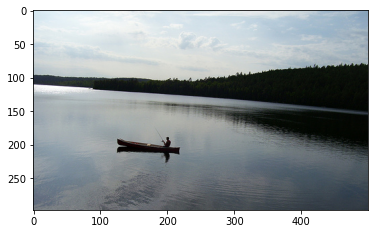

The predicted labels >>  person, dining table, 
The actual labels >>  person, boat, 



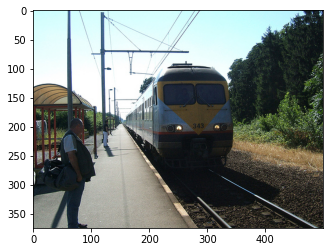

The predicted labels >>  person, dining table, 
The actual labels >>  person, bus, train, dining table, 



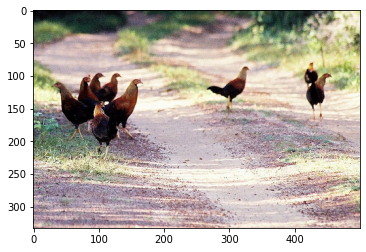

The predicted labels >>  person, dining table, 
The actual labels >>  bird, 



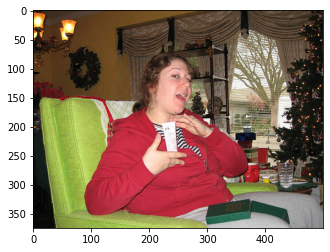

The predicted labels >>  person, dining table, 
The actual labels >>  person, bottle, chair, potted plant, sofa, 



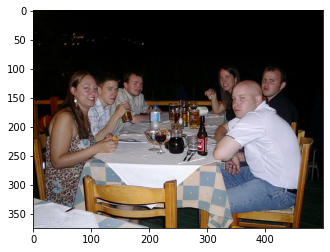

The predicted labels >>  person, dining table, 
The actual labels >>  person, dining table, 



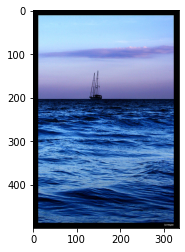

The predicted labels >>  person, dining table, 
The actual labels >>  boat, 



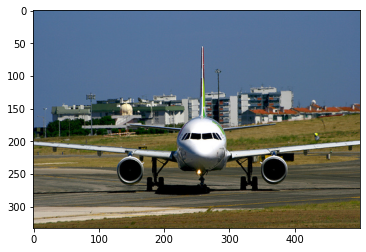

The predicted labels >>  person, dining table, 
The actual labels >>  aeroplane, 



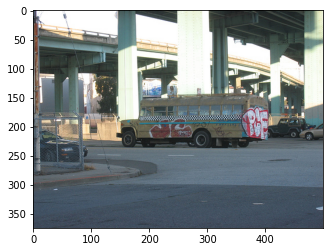

The predicted labels >>  person, dining table, 
The actual labels >>  bus, car, 



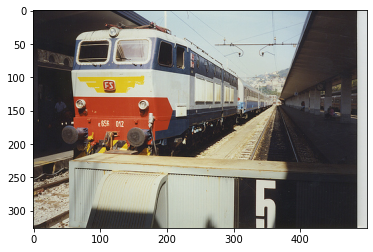

The predicted labels >>  person, dining table, 
The actual labels >>  person, train, 



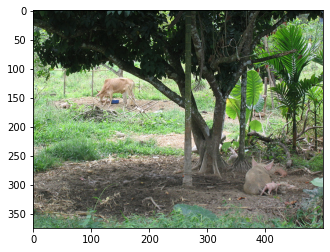

The predicted labels >>  person, dining table, 
The actual labels >>  person, cow, potted plant, sofa, 



In [247]:
# testing on some image

for i in range(0, 100, 10):
    result = model.predict(X_train[i].reshape(1,224,224,3))

    # image
    url = dataPascal['train_sent_final'][0][i][0][0]
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    plt.show()

    # predicted labels
    print("The predicted labels >> ", end=" ")
    for k in getPredictedLabels(result): 
        print(k, end=", ")
    print("")

    # the actual label for the image
    print("The actual labels >> ", end=" ")
    for k in getLabels(y_train[i]): 
        print(k, end=", ")
    print("")
    print("")


*********************************
*********************************

# Task 2

In [248]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [249]:
# storing images, descriptions and their labels

# image array
image_data = []
# description array
descriptions = []
# labels
label = []
for i in range(1000):  
    image_data.append(X[i])   # image
    label.append(y[i])        # label
    all_desc = dataPascal['train_sent_final'][0][i][1][0]   # desc
    some_desc = []
    for j in range(5):    
        some_desc.extend((all_desc[j][0]).split())
    descriptions.append(list(set(some_desc)))



In [250]:
# number of datasets for this task

print("image data   : ", len(image_data))
print("descriptions : ", len(descriptions))
print("labels       : ", len(label))


image data   :  1000
descriptions :  1000
labels       :  1000


In [251]:
# shape of our images

image_data[0].shape

(224, 224, 3)

In [252]:
# now for a particular image, concatenating all the sentences into a single sentence

descriptions = [" ".join(descriptions[i]) for i in range(len(descriptions))]

In [253]:
# so our desciption now becomes something like this

descriptions[0]

'empty person fishing. lake. of a lone on A out an Man the river. in man canoe fisherman is boat fishing rowboat'

In [254]:
# this function takes the descriptions 
# and returns the cleaned tokens

def clean_descriptions(descriptions):
    descs = []  # all descriptions tokens
    for curr_desc in descriptions:  # 
        text = re.sub("[^a-zA-Z]"," ", curr_desc)  # preprocessing
        
        words = word_tokenize(text.lower())   # lowering

        lemmatizer = WordNetLemmatizer()   # lemmatizer instance
        lemma_words = [lemmatizer.lemmatize(i) for i in words]   # list of tokens
        descs.append(lemma_words)

    return descs # then return it.


In [255]:
# cleaned description as list of tokens

descriptions = clean_descriptions(descriptions)

In [256]:
# sample of our descriptions array

descriptions[0]

['empty',
 'person',
 'fishing',
 'lake',
 'of',
 'a',
 'lone',
 'on',
 'a',
 'out',
 'an',
 'man',
 'the',
 'river',
 'in',
 'man',
 'canoe',
 'fisherman',
 'is',
 'boat',
 'fishing',
 'rowboat']

In [257]:
# now counting all the unique words
# and the maximum length of all the sentences

unique_words = set()
max_len = 0

for sent in descriptions:
    unique_words.update(sent)
    if max_len < len(sent):
        max_len = len(sent)

print("\nunique words: ", len(list(unique_words)))
print("max len     : ", max_len)


unique words:  2661
max len     :  44


In [258]:
# deciding hyperparameters 
# such as max length, embedding dimension and vocabulary size


vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = max_len    

In [259]:
# now since our model doesn't understand strings,
# we need to convert them into list of integers instead of list of strings

# to achieve this we're using tokenizer

tokenizer = Tokenizer(num_words = vocab_size, char_level = False)    # tokenizer instance

tokenizer.fit_on_texts(list(descriptions))   # fitting all the descriptions to it

# now converting them from list of strings to list of integers
descriptions = tokenizer.texts_to_sequences(descriptions)   

# padding them to make a fixed length array for every images
descriptions = pad_sequences(descriptions, maxlen = max_length)


In [260]:
# shape of our descriptions

descriptions.shape

(1000, 44)

In [261]:
# our each description looks something like this

descriptions[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        109,   86,  411,  150,    6,    1,  670,    4,    1,   48,   10,
         19,    2,  176,    5,   19,  332, 1447,    3,   84,  411, 1005],
      dtype=int32)

#### Feature extraction from `descriptions`

In [262]:
# SimpleRNN model
# we'll train this SimpleRNN model on the dataset we have
# then we will use the feature extraction layer to get all the features corresponding to each description

text_model=Sequential()
text_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
text_model.add(SimpleRNN(100))
text_model.add(Dense(20, activation='sigmoid'))

text_model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

text_model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 44, 300)           798300    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_30 (Dense)             (None, 20)                2020      
Total params: 840,420
Trainable params: 840,420
Non-trainable params: 0
_________________________________________________________________


In [263]:
# just checking the dimensions

descriptions = np.array(descriptions)
label = np.array(label)

print("descriptions shape : ", descriptions.shape)
print("labels shape       : ", label.shape)

descriptions shape :  (1000, 44)
labels shape       :  (1000, 20)


In [264]:
# SimpleRNN training
# now we're training our model

# hyperparameters
batch_size = 64
num_epochs = 5

# training
history = text_model.fit(descriptions,
                    label,
                    batch_size=batch_size,
                    epochs = num_epochs,
                    verbose = 0)



In [265]:
# now getting a new feature extraction model
# for this we're taking the output of 2nd last layer of trained model

# 2nd last layer :: feature extractor
last_layer = text_model.layers[-2].output

# feature extraction model
only_feature_text_model = Model(inputs = text_model.input, outputs=last_layer)

In [266]:
# extracting all the features from the descriptions

text_features = only_feature_text_model.predict(descriptions)

In [267]:
# shape of our features

text_features.shape

(1000, 100)

**now we have text_features, we can use it later**

---



#### Feature extraction from `images`

In [268]:
# this is again a ResNet model to extract image features

def getCNNModel():
  # instance of resnet model  
  resNetModel = ResNet50(include_top=True) 
  # now getting a model with ignoring the last layer of resnet model
  modelCNN = Model(inputs = resNetModel.input,outputs = resNetModel.layers[-2].output)
  modelCNN.summary()
  return modelCNN

In [269]:
# model for image feature extraction

modelCNN = getCNNModel()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [270]:
# now using above model to get features of each images
# this function takes an image data
# and returns extracted featuress out of it using resnet model

def getImageFeatures(image_data):
    extracted_features = []
    for i in range(len(image_data)):
        image = image_data[i].reshape(1,224,224,3)   # just reshaping for compatibility
        # gettting features from the image
        extracted_feature = modelCNN.predict(image).reshape(2048,) 
        extracted_features.append(extracted_feature)
    return extracted_features  


In [271]:
# using above function, generating features for each of the image

image_features = getImageFeatures(image_data)
print("features extracted : ", len(image_features))

features extracted :  1000


In [272]:
# numpy array

image_features = np.array(image_features)

**now we have image_features**

---



**Now we'll combine both the features extracted into one single array and we'll pass it to Classifier (FNN) to get final prediction**

In [273]:
# let's check first dimensions.

text_features = np.array(text_features)
image_features = np.array(image_features)

text_features.shape, image_features.shape, label.shape

((1000, 100), (1000, 2048), (1000, 20))

In [274]:
# combining bot hthe features into a single array

total_feature = []
for i in range(len(text_features)):
    im_f = list(image_features[i])
    im_f.extend(list(text_features[i]))
    total_feature.append(im_f)

total_feature = np.array(total_feature)
print("total features shape: ", total_feature.shape)

total features shape:  (1000, 2148)


In [275]:
# input size for classifier

in_size = (total_feature.shape)[1]
print("input size for classifier: ", in_size)

input size for classifier:  2148


### Final Classifier (FNN)

In [276]:
# simple classifier model
# the input for this would be the combined (both) features

model = Sequential()
model.add(Input(in_size))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='sigmoid'))   # 20 neurons because we've 20 classes
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               275072    
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)                1300      
Total params: 284,628
Trainable params: 284,628
Non-trainable params: 0
_________________________________________________________________


In [277]:
# now compiling our model

# Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)
# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [278]:
X_train = total_feature[:800]
y_train = label[:800]
X_test = total_feature[800:]
y_test = label[800:]

In [279]:
# training 

model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=75, batch_size=64)

Epoch 1/75
13/13 [==============================] - 1s 31ms/step - loss: 0.7442 - accuracy: 0.0464 - precision_6: 0.1403 - recall_6: 0.3265 - val_loss: 0.4386 - val_accuracy: 0.4350 - val_precision_6: 0.5025 - val_recall_6: 0.1766
Epoch 2/75
13/13 [==============================] - 0s 7ms/step - loss: 0.5205 - accuracy: 0.0860 - precision_6: 0.2018 - recall_6: 0.2714 - val_loss: 0.3874 - val_accuracy: 0.4400 - val_precision_6: 0.6190 - val_recall_6: 0.0682
Epoch 3/75
13/13 [==============================] - 0s 7ms/step - loss: 0.4663 - accuracy: 0.1779 - precision_6: 0.2348 - recall_6: 0.2466 - val_loss: 0.3700 - val_accuracy: 0.4350 - val_precision_6: 0.7000 - val_recall_6: 0.0857
Epoch 4/75
13/13 [==============================] - 0s 8ms/step - loss: 0.4420 - accuracy: 0.1641 - precision_6: 0.2796 - recall_6: 0.2316 - val_loss: 0.3533 - val_accuracy: 0.6150 - val_precision_6: 0.6653 - val_recall_6: 0.2850
Epoch 5/75
13/13 [==============================] - 0s 7ms/step - loss: 0.4241 

#### Predictions and Testing

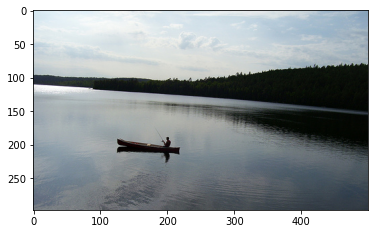

The predicted labels >>  person, boat, dining table, 
The actual labels >>  person, boat, 



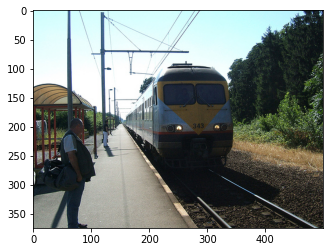

The predicted labels >>  person, dining table, 
The actual labels >>  person, bus, train, dining table, 



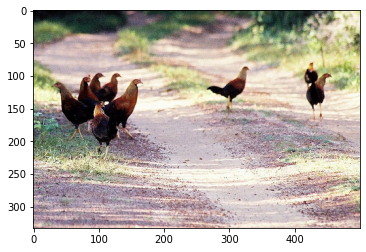

The predicted labels >>  bird, potted plant, 
The actual labels >>  bird, 



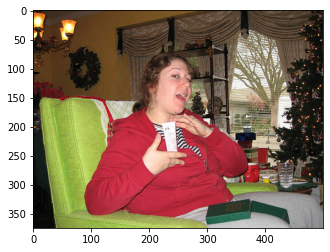

The predicted labels >>  person, chair, dining table, sofa, tv, 
The actual labels >>  person, bottle, chair, potted plant, sofa, 



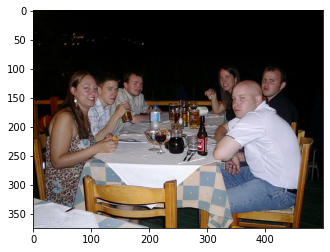

The predicted labels >>  person, dining table, 
The actual labels >>  person, dining table, 



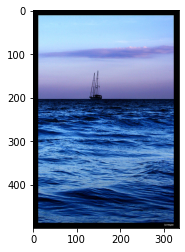

The predicted labels >>  person, potted plant, 
The actual labels >>  boat, 



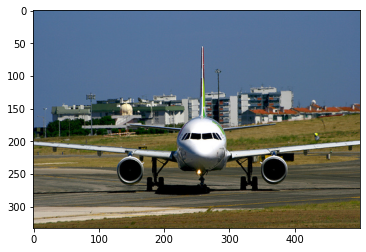

The predicted labels >>  person, aeroplane, dining table, 
The actual labels >>  aeroplane, 



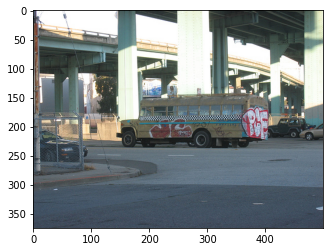

The predicted labels >>  person, bus, car, 
The actual labels >>  bus, car, 



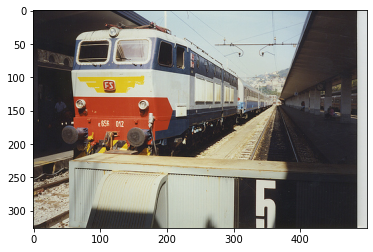

The predicted labels >>  person, car, train, 
The actual labels >>  person, train, 



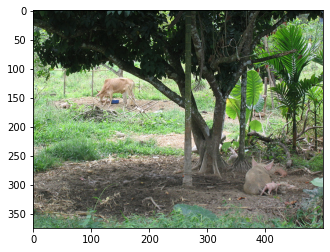

The predicted labels >>  person, chair, dining table, sofa, 
The actual labels >>  person, cow, potted plant, sofa, 



In [280]:
# testing on some image

for i in range(0, 100, 10):
    result = model.predict(X_train[i].reshape(1,2148))

    # image
    url = dataPascal['train_sent_final'][0][i][0][0]
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    plt.show()

    # predicted labels
    print("The predicted labels >> ", end=" ")
    for k in getPredictedLabels(result): 
        print(k, end=", ")
    print("")

    # the actual label for the image
    print("The actual labels >> ", end=" ")
    for k in getLabels(y_train[i]): 
        print(k, end=", ")
    print("")
    print("")


*****

# Task 3

In [281]:
# our training dataset

X_train = X[:800]
y_train = y[:800]

In [282]:
# mapping each image to its descriptions

# the key for this deictionary is image index and value is a list containing descriptions
image_descMap = {}
for i in range(800):
  temp=dataPascal['train_sent_final'][0][i][1][0]
  for j in range(5):
    desc_j = temp[j]
    if i not in image_descMap:
      image_descMap[i] = [desc_j]
    else:
      image_descMap[i].append(desc_j)

In [283]:
# cleaning our descriptions.

removePunc = str.maketrans('', '', string.punctuation)
for key, val in image_descMap.items():
  for i in range(len(val)):
    text = val[i][0]
    text = text.split()   # taking each words
    text = [item.lower() for item in text]   # then lowercasing it.
    text = [item.translate(removePunc) for item in text] # removeing punnctuation
    text = [item for item in text if item.isalpha()]  # removing deigits
    val[i] =  ' '.join(text)  # now concatenating all words into sentence
    # ** here adding "sl" to starting of each caption and "el" at the end.
    # just to recognize the caption starting end and ending end.
    val[i] = 'sl ' + val[i] + ' el' 

In [284]:
# here, we're finding the frequency of each word
wordFreq ={}
for key,val in image_descMap.items():
  for line in val:
    for token in line.split():
      if token not in wordFreq:
        wordFreq[token] = 0
      else:
        wordFreq[token]+=1
        

In [285]:
# here is the output of the previous cell

wordFreq

{'sl': 3999,
 'man': 325,
 'in': 1103,
 'a': 5545,
 'boat': 76,
 'fishing': 12,
 'el': 3999,
 'out': 85,
 'of': 698,
 'canoe': 12,
 'lone': 3,
 'fisherman': 0,
 'rowboat': 1,
 'on': 1159,
 'an': 290,
 'empty': 43,
 'lake': 36,
 'person': 48,
 'is': 1228,
 'the': 1400,
 'river': 25,
 'train': 184,
 'and': 593,
 'flags': 3,
 'snow': 27,
 'two': 377,
 'flying': 44,
 'as': 22,
 'engine': 18,
 'passes': 9,
 'by': 126,
 'fly': 6,
 'cloudy': 2,
 'landscape': 0,
 'before': 11,
 'yellow': 72,
 'locomotive': 11,
 'travelling': 4,
 'somewhere': 1,
 'snowy': 20,
 'truck': 18,
 'passing': 18,
 'through': 75,
 'car': 103,
 'port': 7,
 'appears': 0,
 'to': 260,
 'be': 9,
 'deserted': 2,
 'signs': 0,
 'are': 363,
 'posted': 0,
 'for': 147,
 'different': 4,
 'routes': 0,
 'bus': 198,
 'depot': 5,
 'cars': 25,
 'sit': 43,
 'outside': 73,
 'building': 40,
 'or': 11,
 'station': 37,
 'parking': 31,
 'lot': 44,
 'stands': 60,
 'mostly': 1,
 'team': 5,
 'planes': 8,
 'stream': 2,
 'past': 16,
 'group': 93,


In [286]:
# copy of the image_descmap

image_descEncoding = image_descMap

In [287]:
# now we'll create index for each words

wordIndex={}

# starting from index 1
ind = 1
for key,value in wordFreq.items():
  if wordFreq[key]>=0:
    wordIndex[key] = ind
    ind += 1

In [288]:
ind

2682

In [289]:
# 

for key, value in image_descEncoding.items():
  for line in value:
    desc_index = []
    for item in line.split():  
      desc_index.append(wordIndex[item])

    image_descEncoding[key][value.index(line)] = np.array(desc_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [290]:
# this function is to generate sequences of image, descriptions and caption,
# something like this (for each image)
# image1, desc1,  cap1
# image1, desc2,  cap2
# image1, desc3,  cap3
# image1, desc4,  cap4 ... and so on.


# it takes the features (image) and captions
# and returns list of three arrays  
# something like this
# [image1, desc1, caption1]

def getImageCapt(features,image_descEncoding):
  desc = []
  capt = []
  img = []

  for key, value in image_descEncoding.items():
    for line in value:
      for k in range(1, len(line)):
        desc_inp = [line[:k]]   # first k-1 words are input desc
        desc_out = line[k]      # and the k'th word is output caption

        desc_inp = pad_sequences(desc_inp, maxlen=20, padding="post", truncating="post")[0]    # padding to make fixed length
        desc_out = to_categorical([desc_out], num_classes=ind)[0]   # 

        desc.append(desc_inp)  # input description
        capt.append(desc_out)  # output caption
        img.append(features[key])  # image
 
  return [np.array(img,dtype='float64'),np.array(desc,dtype ='float64'),np.array(capt,dtype = 'float64')]      

In [291]:
# this function is to merge tow model into one model
# image  descs
#   |      |
#   |      |
#    \    /
#      \ /
#       |
#       |
#     captions


def getModel():
    # the first model :: this is for image
  firstModeInput = Input(shape=(2048,))
  layer1_Mode1 = Dropout(0.4)(firstModeInput)
  layer2_Mode1 = Dense(128, activation='relu')(layer1_Mode1)
  layer3_Mode1 = Dense(256, activation='relu')(layer2_Mode1)

    # the second model :: this is for descriptions
  secondModeInput = Input(shape=(20,))
  layer1_Mode2 = Embedding(ind, 256)(secondModeInput)
  layer2_Mode2 = Dropout(0.4)(layer1_Mode2)
  layer3_Mode2 = LSTM(256)(layer2_Mode2)
 
    # the final model 
  FNN1 = add([layer3_Mode1, layer3_Mode2])
  FNN2 = Dense(128, activation='relu')(FNN1)
  FNN3 = Dense(256, activation='relu')(FNN2)
  outputLayer = Dense(ind, activation='softmax')(FNN3)
  model = Model(inputs=[firstModeInput, secondModeInput], outputs=outputLayer)
    # compie and return
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [292]:
# this gives us a model capable of extracting features
# this uses resnet model and removes the last layer from it.

def getCNNModel():
  resNetModel = ResNet50(include_top=True)    # instance of resnet model
  # creating new model out of it
  # here the output layer is the 2nd last layer.
  modelCNN = Model(inputs = resNetModel.input,outputs = resNetModel.layers[-2].output) 
  modelCNN.summary()
  return modelCNN

In [293]:
# summary of feature extractor model

modelCNN = getCNNModel()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [294]:
# this function simply uses the above cnn model and give extracted features

def getImageFeatures():
  extracted_features = {}
  for i in range(len(X_train)):
      image = X_train[i].reshape(1,224,224,3)  # reshaping for compatibility
      extracted_feature = modelCNN.predict(image).reshape(2048,) # getting feature using snn model
      extracted_features[i] = extracted_feature
      
  return extracted_features      

In [295]:
# fetures extracted

image_features = getImageFeatures()

In [296]:
# our dataset generated in the required input format

trainData = getImageCapt(image_features,image_descEncoding)

In [297]:
# the final model
modelFinal = getModel()

# training the final model.
modelFinal.fit([trainData[0], trainData[1]], trainData[2], batch_size=256, epochs=20)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
dropout_34 (Dropout)            (None, 2048)         0           input_14[0][0]                   
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 20, 256)      686592      input_15[0][0]                   
___________________________________________________________________________________________

**Prediction and generating captions for images**

In [298]:
# a function to generate caption
# it takes image index as input
# and return the generated caption

def generate_caption(image_index):
    imageFeatures = modelCNN.predict(X_train[image_index].reshape(1,224,224,3)).reshape(1,2048)   # any image
    generatedCaption = []  # initialize caption to empty array; we'll create this as we go
    ind = 0    
    outputWord = ''
    input = ['sl']

    while ind < 20 and outputWord != 'el':
            textIndex = []
            for i in input:
                textIndex.append(wordIndex[i])

            textIndex = [textIndex]
            textIndex = pad_sequences(textIndex, padding='post', truncating='post', maxlen=20)   # padding 
            # predicting each captions and concatenating them.
            outputWord = list(wordIndex.keys())[list(wordIndex.values()).index(np.argmax(modelFinal.predict([imageFeatures, textIndex])))]
            if outputWord == 'el':
                break
            generatedCaption.append(outputWord)
            input.append(outputWord)  # now for next iteration, input will be increased by the current output
            ind += 1

    return (' '.join(generatedCaption))

### generating captions 

CAPTION >>  a man is fishing out of a canoe


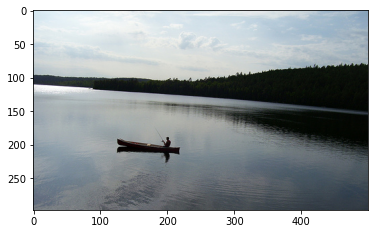




CAPTION >>  a white colored cow is parked at the camera


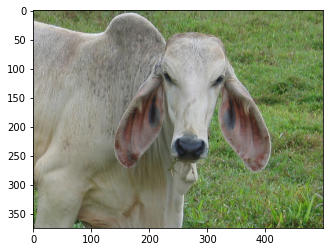




CAPTION >>  a bus turns among a corner


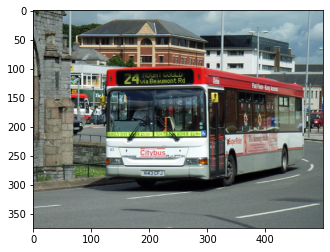




CAPTION >>  a cat is stretched in a chair


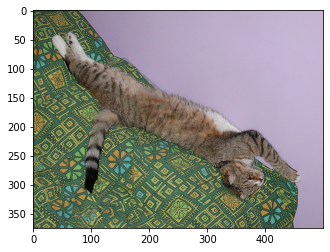




CAPTION >>  a family of woman are sitting on a couch


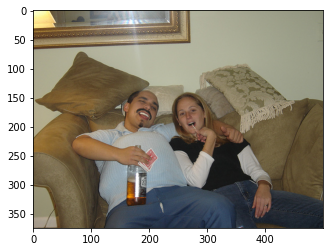

In [299]:
# generating image captions for some images

for i in range(0, 500, 100):
    caption = generate_caption(i)
    print("CAPTION >> ", caption)
    

    url = dataPascal['train_sent_final'][0][i][0][0]
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    plt.show()
    print("\n\n")